# Introduction

The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount. In many cases, the lender also adds interest or finance charges to the principal value, which the borrower must repay in addition to the principal balance. (credit: [Investopedia](https://www.investopedia.com/terms/l/loan.asp))

## Problem Statement

## About the Dataset

The used for this problem is [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset). Each Applicant is attributed with the following columns in this data set and are as follows:

| Column | Description |
| ----------- | ----------- |
| Loan_ID | Unique Loan ID |
| Gender | Male/Female |
| Married | Whether Married : Yes/No |
| Dependents | No. of people depending on the Applicant |
| Education | Graduate/Undergraduate |
| Self_Employment | Whether Self_Employment : Yes/No |
| ApplicantIncome | Applicant Income |
| CoapplicantIncome | Co-Applicant Income |
| LoanAmount | Loan Amount (in thousands) |
| Loan_Amount_Term | Loan Duration |
| Credit_History | Credit History of the Applicant |
| Property_Area | Urban/Semiurban/Rural |
| Loan_Status | Whether Loan Approved: Yes/No |

The dimensions of the dataset is 614*13

# Importing Libraries

Importing the required libraires for data analysis and machine learning

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Dataset

Import the dataset and checking its related info

In [2]:
train_path = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_path = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_path.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre-Processing & Data Analysis

## Missing Values

Checking for missing values and removing/filling the missing values. 

We can visualise the data with the help of a heatmap in order to know which rows are missing.

In [6]:
train_path.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

A better way to look at this is by visualizing the missing values

<Axes: >

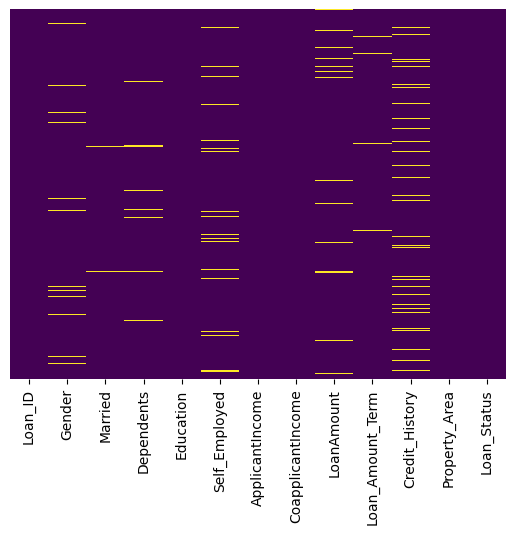

In [7]:
sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We drop the 'Loan_ID' column as it won't be a variable for the person/loanee but rather a way to identify the person which is not required for the EDA and Machine Learning

In [8]:
train_path.drop(['Loan_ID'],axis=1,inplace=True)

Removing Missing Values for categorical terms with the help of mode

In [9]:
train_path['Gender'] = train_path['Gender'].fillna(train_path['Gender'].mode()[0])
train_path['Married'] = train_path['Married'].fillna(train_path['Married'].mode()[0])
train_path['Dependents'] = train_path['Dependents'].fillna(train_path['Dependents'].mode()[0])
train_path['Self_Employed'] = train_path['Self_Employed'].fillna(train_path['Self_Employed'].mode()[0])
#train_path['Credit_History'] = train_path['Credit_History'].fillna(train_path['Credit_History'].mode()[0])
#train_path['Loan_Amount_Term'] = train_path['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mode()[0])    

Removing Missing Values for numerical terms with the help of mean

In [10]:
train_path ['LoanAmount'] = train_path ['LoanAmount'].fillna(train_path['LoanAmount'].mean())
train_path ['Loan_Amount_Term'] = train_path ['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mean())
train_path ['Credit_History'] = train_path ['Credit_History'].fillna(train_path['Credit_History'].mean())

In [11]:
#typ1 = SI(strategy="constant", fill_value="missing")
#typ2 = SI(strategy="constant", fill_value="1")
#typ3 = SI(strategy="mean")
#typ4 = SI(strategy="constant", fill_value="Y")

#col1 = ["Gender","Married","Self_Employed","ApplicantIncome","CoapplicantIncome","Property_Area"]
#col2 = ["Dependents","Education","Credit_History"]
#col3 = ["LoanAmount","Loan_Amount_Term"]
#ol4 = ["Loan_Status"]

#imputer = CT([("typ1",typ1,col1),("typ2",typ2,col2),("typ3",typ3,col3),("typ4",typ4,col4)])

#train_missing = imputer.fit_transform(train_path)
#len(train_missing)

#train_path = pd.DataFrame(train_missing,columns=["Gender","Married","Self_Employed","ApplicantIncome","CoapplicantIncome","Property_Area","Dependents","Education","Credit_History","LoanAmount","Loan_Amount_Term","Loan_Status"])


In [12]:
#train_path['LoanAmount']=train_path['LoanAmount'].fillna(train_path['LoanAmount'].mean())
#train_path['Credit_History']=train_path['Credit_History'].fillna(train_path['Credit_History'].median())
#train_path.dropna(inplace=True)

Re-verifying whether all the missing values are removed/filled.

In [13]:
train_path.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

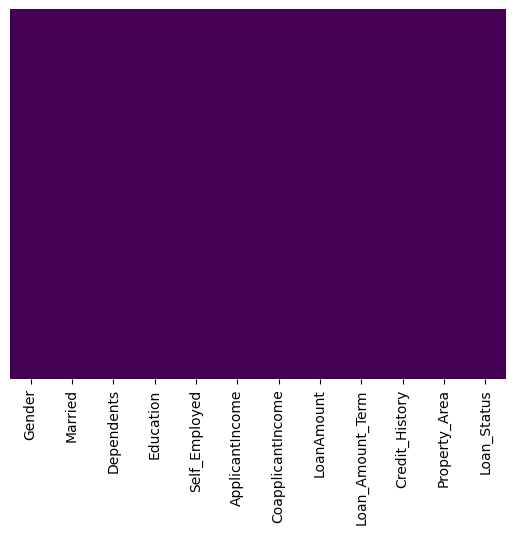

In [14]:
sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
train_path.shape

(614, 12)

## Exploratory Data Analysis

We visualize all the variables in the count of their types. 

eg. Gender: Male or Female, Married: Yes or No, etc.

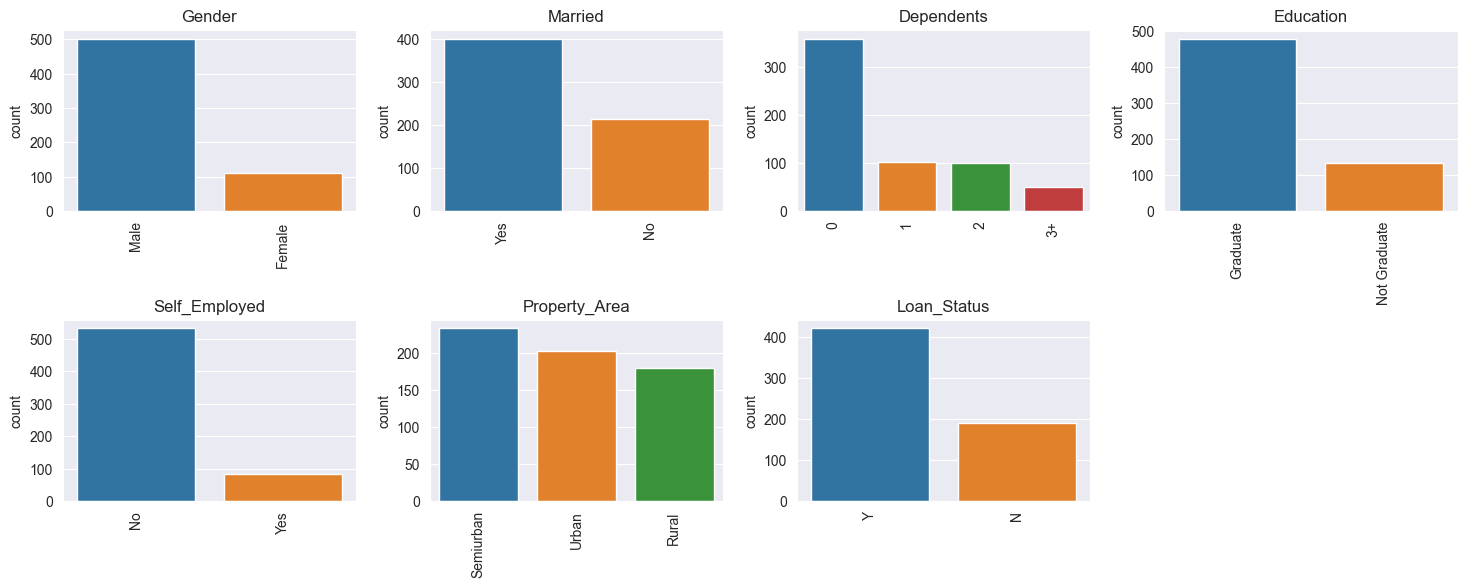

In [16]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

obj = (train_path.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,40))
index = 1

for col in object_cols:
    y = train_path[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6,wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

From the above the plots we can see that most of the people applying for loans are:
Male, Married, Graduates and not Self_Employed

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

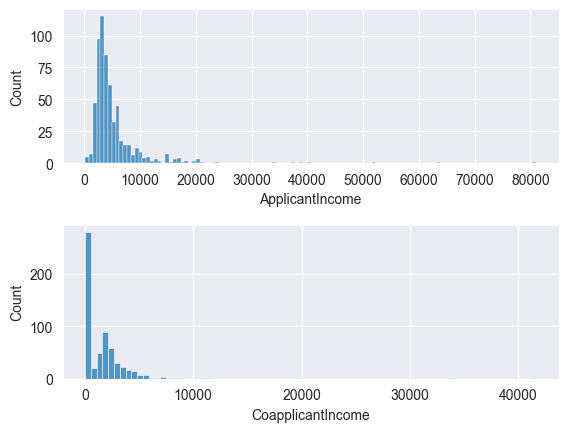

In [17]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(train_path['ApplicantIncome'],ax=axes[0,0])
plt.subplots_adjust(hspace=0.4)
sns.histplot(train_path['CoapplicantIncome'],ax=axes[1,0])

A point to notice is that the Coapplicant Income < Applicant Income. This can be justifyed from plot 1 where we saw that most of the people had 0 dependents. Another things we can see is that the Coapplicant Income is relatively lower than the Applicant Income

In [18]:
#g = sns.FacetGrid(data=train_path,col='AppicantIncome',row='CoappicantIncome')

#g.map(sns.countplot,'Dependents',palette="tab10")
#plt.subplots_adjust(wspace = 0.75,hspace=0.25)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

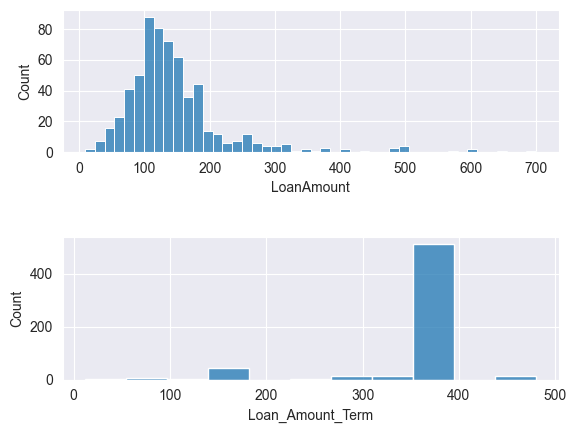

In [19]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(train_path['LoanAmount'], ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(train_path['Loan_Amount_Term'], ax=axes[1,0])

[Text(0.5, 1.0, 'Loan_Status based on Married')]

<Figure size 1000x400 with 0 Axes>

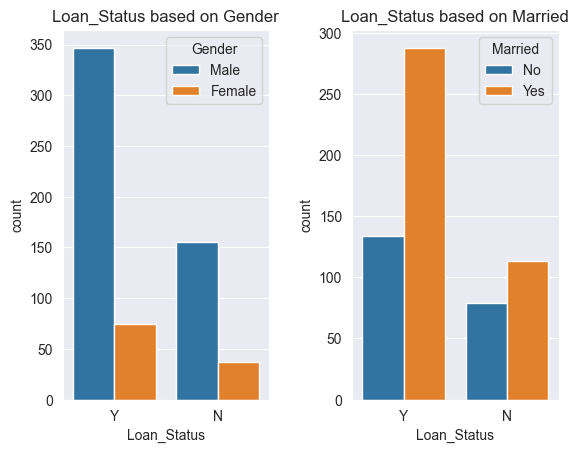

In [20]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Gender',data=train_path).set(title="Loan_Status based on Gender")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Married',data=train_path).set(title="Loan_Status based on Married")

[Text(0.5, 1.0, 'Loan_Status based on Self_Employed')]

<Figure size 1000x400 with 0 Axes>

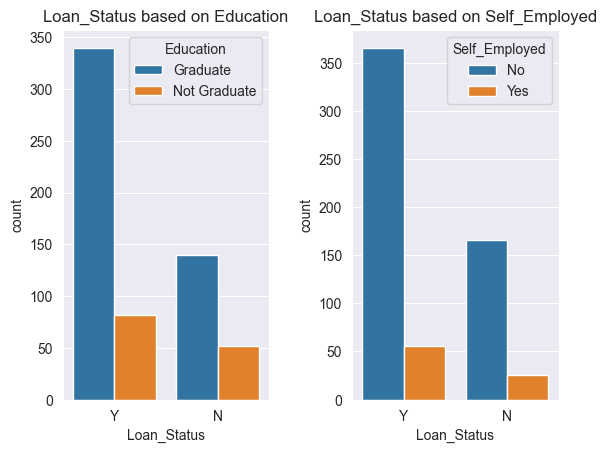

In [21]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Education',data=train_path).set(title="Loan_Status based on Education")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Self_Employed',data=train_path).set(title="Loan_Status based on Self_Employed")

[Text(0.5, 1.0, 'Loan_Status based on Property_Area')]

<Figure size 1000x400 with 0 Axes>

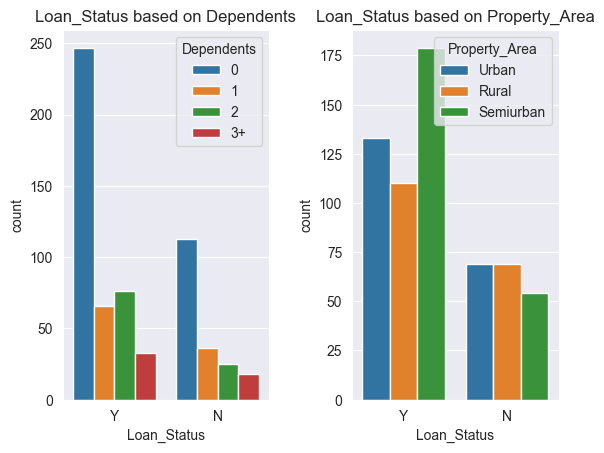

In [22]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Dependents',data=train_path).set(title="Loan_Status based on Dependents")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Property_Area',data=train_path).set(title="Loan_Status based on Property_Area")

c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


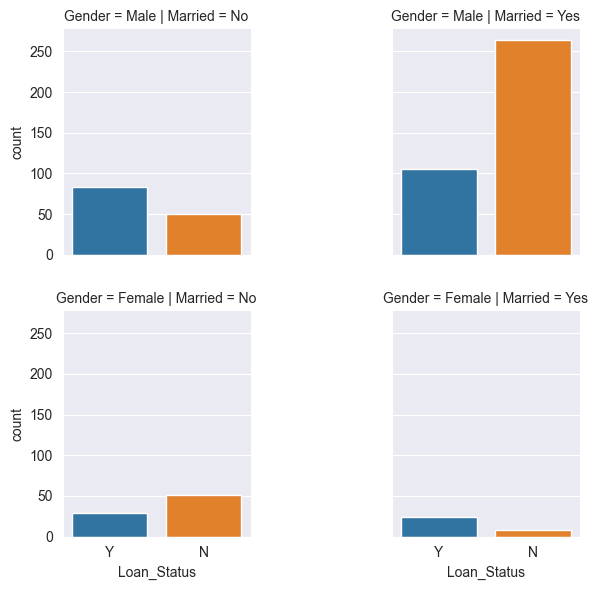

In [23]:
g = sns.FacetGrid(data=train_path,col='Married',row='Gender')

g.map(sns.countplot,'Loan_Status',palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


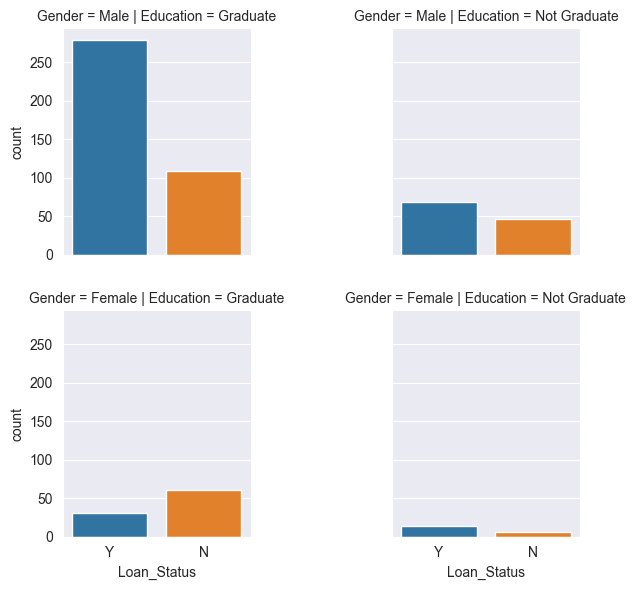

In [24]:
g = sns.FacetGrid(data=train_path,col='Education',row='Gender')

g.map(sns.countplot,'Loan_Status', palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

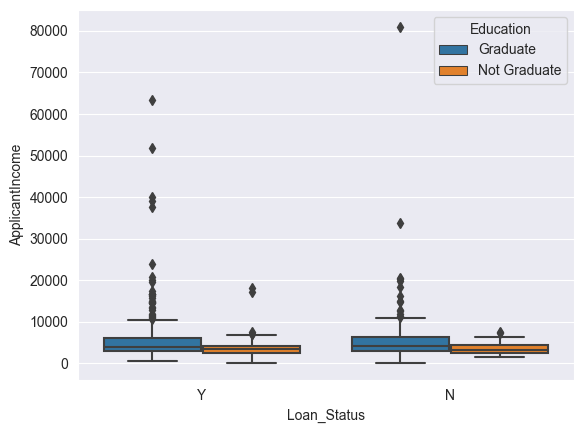

In [25]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_path,hue='Education')

c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


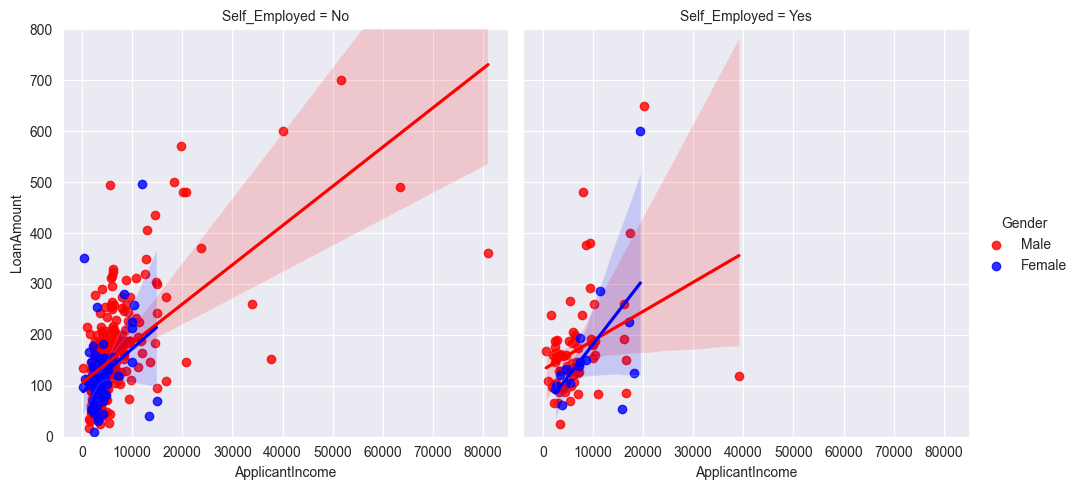

In [26]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train_path , col='Self_Employed', hue='Gender',palette= ["Red" , "Blue","Yellow"])
g.set(ylim=(0, 800))

## Encoding

We now encode the 'categorical variables' i.e. 'objects' into 'floats'. We dp this with the help of Label Encoder

In [27]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [28]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
  train_path[col] = label_encoder.fit_transform(train_path[col])

In [29]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## Correlation

<Axes: >

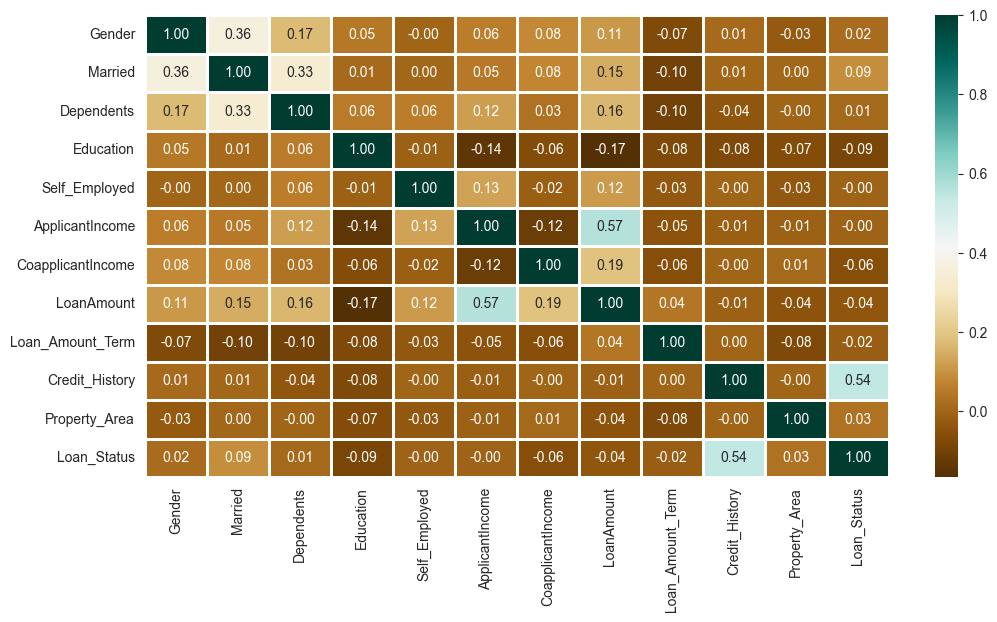

In [30]:
plt.figure(figsize=(12,6))
  
sns.heatmap(train_path.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

We can see that the 'Loan_Status' of a person can be heavly affected by their 'Credit_History'

# Model Training

We are training the model in order to determine whether a person will get a Loan or not. In order to do that we need to make the model to predict/determine the 'Loan_Status'of a person.

In [31]:
from sklearn.model_selection import train_test_split
  
x_status = train_path.drop(['Loan_Status'],axis=1)
y_status = train_path['Loan_Status']
x_status.shape,y_status.shape
  
x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.4,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [32]:
#knn = KNeighborsClassifier(n_neighbors=3)
#rfc = RandomForestClassifier(n_estimators = 7)
#logr = LogisticRegression()
#linr = LinearRegression()
#svc = SVC()
#gbc = GradientBoostingClassifier()
#gaussian = GaussianNB()

In [33]:
#from sklearn.model_selection import StratifiedKFold

In [34]:
#x_train,x_test = x_status.loc[train_index],x_status.loc[test_index]
#y_train,y_test = y_status[train_index],y_status[test_index]

In [35]:
#i=1
#mean_train = 0
#mean_test = 0
#kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#for train_index,test_index in kf.split(x_status,y_status):
    #print ('\n{} of kfold {} '.format(i,kf.n_splits))
    #####
    #model = RandomForestClassifier()
    #model.fit(x_train,y_train)
    #y_train_pred=model.predict(x_test)
    #y_test_pred= model.predict(x_train)
    #score_train=accuracy_score(y_test,y_train_pred)
    #score_test=accuracy_score(y_train,y_test_pred)
    #mean_train += score_train
    #mean_test += score_test
    #print ('accuracy_score of train:',score_train)
    #print ('accuracy_score of test:',score_test)
    #i+=1

#print ('\n Mean Validation Accuracy',mean_train/(i-1))
#print ('\n Mean Validation Accuracy',mean_test/(i-1))

#plt.figure(figsize=(10,4))
#labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
#X_axis = np.arange(len(labels))
#ax = plt.gca()
#plt.ylim(0.40000, 1)
#plt.bar(X_axis-0.2, score_train, 0.4, color='blue', label='Train')
#plt.bar(X_axis+0.2, score_test, 0.4, color='red', label='Test')
#plt.xticks(X_axis, labels)
#plt.legend()
#plt.grid(True)
#plt.show()

In [36]:
def clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test):
        model_clf.fit(x_train, y_train)
        y_train_pred = model_clf.predict(x_test)
        #y_test_pred= model_clf.predict(x_train)
        train_accuracy = model_clf.score(x_test,y_test)
        
        class_train_rep = classification_report(y_test,y_train_pred)
        
        print(model_clf.__class__.__name__, "Train :","\n",class_train_rep)
        print("r2 score of", model_clf.__class__.__name__, "=",r2_score(y_test, y_train_pred),"\n")
        print("Cross Validation Score of", model_clf.__class__.__name__, "=",np.mean(cross_val_score(model_clf,x_train,y_train,cv=5)),"\n")
        print("Training Accuracy:",train_accuracy)

        cm = confusion_matrix(y_test,y_train_pred)
        #print("Confusion Matrix: \n", cm)
        cmhm = sns.heatmap(cm,annot=True,fmt='g')
        cmhm.set_xlabel("Predicted", labelpad=20)
        cmhm.set_ylabel("Actual", labelpad=20)

### K-Nearest Neighbors Classifier

KNeighborsClassifier Train : 
               precision    recall  f1-score   support

           0       0.31      0.13      0.18        85
           1       0.65      0.84      0.73       161

    accuracy                           0.60       246
   macro avg       0.48      0.49      0.46       246
weighted avg       0.53      0.60      0.54       246

r2 score of KNeighborsClassifier = -0.7796127146510781 

Cross Validation Score of KNeighborsClassifier = 0.6930025916327286 

Training Accuracy: 0.5975609756097561


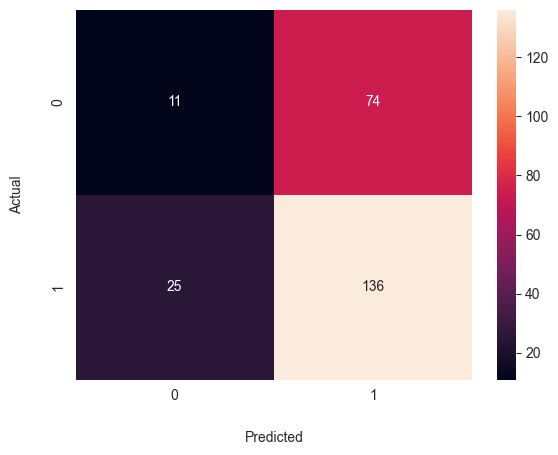

In [37]:
KNC = KNeighborsClassifier()
model_clf = KNC
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)


### Random Forest Classifier

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       0.83      0.46      0.59        85
           1       0.77      0.95      0.85       161

    accuracy                           0.78       246
   macro avg       0.80      0.70      0.72       246
weighted avg       0.79      0.78      0.76       246

r2 score of RandomForestClassifier = 0.0293021556448666 

Cross Validation Score of RandomForestClassifier = 0.8044798222880415 

Training Accuracy: 0.7804878048780488


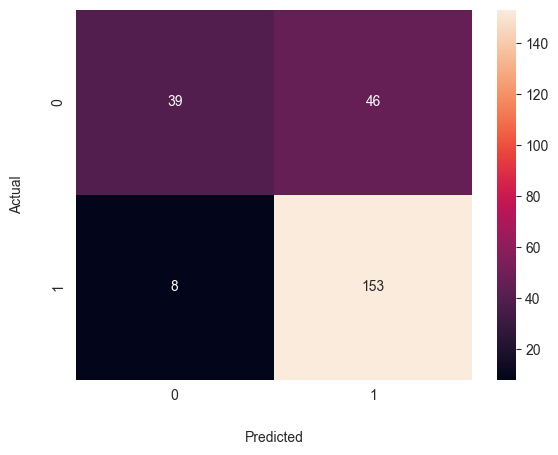

In [38]:
RFC = RandomForestClassifier()
model_clf = RFC
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Decision Tree Classifier

DecisionTreeClassifier Train : 
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        85
           1       0.74      0.80      0.77       161

    accuracy                           0.68       246
   macro avg       0.64      0.63      0.63       246
weighted avg       0.67      0.68      0.68       246

r2 score of DecisionTreeClassifier = -0.4021191085129705 

Cross Validation Score of DecisionTreeClassifier = 0.7309885227693448 

Training Accuracy: 0.6829268292682927


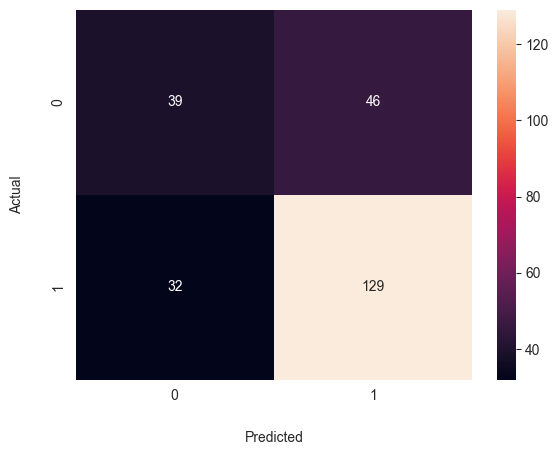

In [39]:
DTC = DecisionTreeClassifier()
model_clf = DTC
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Support Vector Classifier

SVC Train : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.65      0.99      0.79       161

    accuracy                           0.65       246
   macro avg       0.33      0.50      0.39       246
weighted avg       0.43      0.65      0.52       246

r2 score of SVC = -0.5459261965655828 

Cross Validation Score of SVC = 0.7092558311736393 

Training Accuracy: 0.6504065040650406


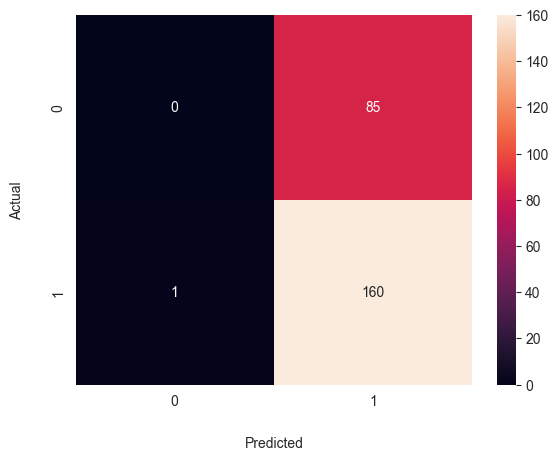

In [40]:
SVC = SVC()
model_clf = SVC
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Fine-Tuning

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       0.96      0.26      0.41        85
           1       0.72      0.99      0.83       161

    accuracy                           0.74       246
   macro avg       0.84      0.63      0.62       246
weighted avg       0.80      0.74      0.69       246

r2 score of RandomForestClassifier = -0.15045670442089887 

Cross Validation Score of RandomForestClassifier = 0.7826360607182524 

Training Accuracy: 0.7398373983739838


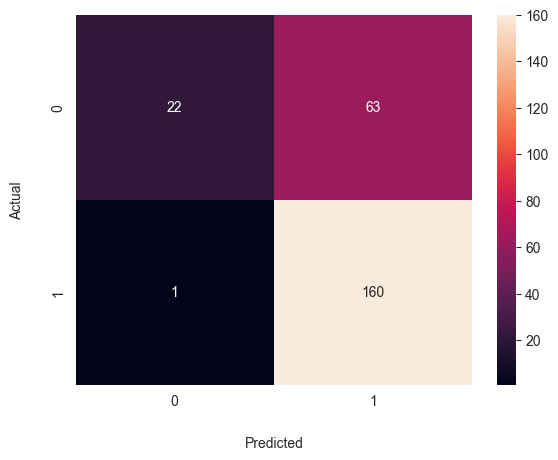

In [41]:
model_clf = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7,max_features=1)
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

# Testing the Model on the Test Dataset

In [42]:
test_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<Axes: >

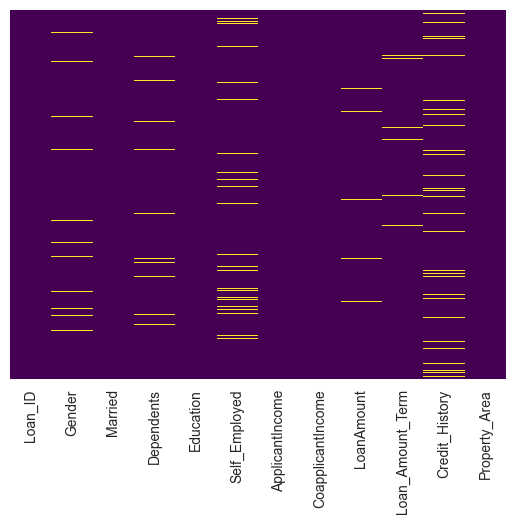

In [43]:
sns.heatmap(test_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
test_path ['Gender'] = test_path ['Gender'].fillna(test_path['Gender'].mode()[0])
test_path ['Married'] = test_path ['Married'].fillna(test_path['Married'].mode()[0])
test_path ['Dependents'] = test_path ['Dependents'].fillna(test_path['Dependents'].mode()[0])
test_path ['Self_Employed'] = test_path ['Self_Employed'].fillna(test_path['Self_Employed'].mode()[0])

In [45]:
test_path ['LoanAmount'] = test_path ['LoanAmount'].fillna(test_path['LoanAmount'].mean())
test_path ['Loan_Amount_Term'] = test_path ['Loan_Amount_Term'].fillna(test_path['Loan_Amount_Term'].mean())
test_path ['Credit_History'] = test_path ['Credit_History'].fillna(test_path['Credit_History'].mean())

<Axes: >

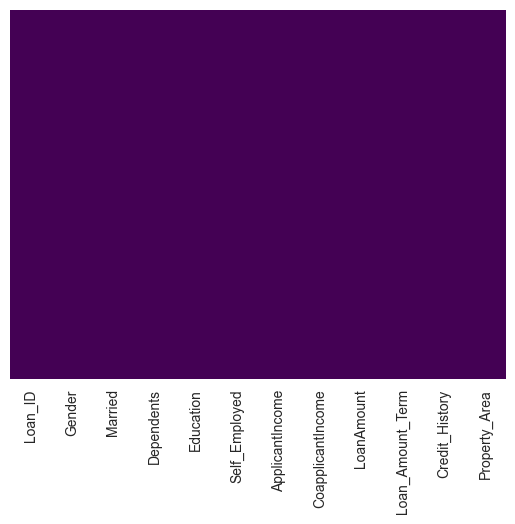

In [46]:
sns.heatmap(test_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
for col in cols:
  test_path[col] = label_encoder.fit_transform(test_path[col])

In [48]:
test_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [49]:
test_path.drop(['Loan_ID'],axis=1,inplace=True)

In [57]:
RFC = RandomForestClassifier()
pred_lr = RFC.predict(test_path)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred_rfc = SVC.predict(test_path)

TypeError: 'SVC' object is not callable

In [ ]:
predict = np.zeros((test_path.shape[0]))

for i in range(0,test_path.shape[0]):
    temp = pred_lr[i] + pred_rfc[i]
    if temp>=2:
        predict[i] = 1
predict = predict.astype('int')

In [ ]:
test_path = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
test_path['Loan_Status'] = predict

In [ ]:
test_path['Loan_Status'] = test_path['Loan_Status'].map({0:'N', 1:'Y'})


In [ ]:
test_path.to_csv('results.csv', index=False)